# Exact enumeration

We have a one dimentional ising model:

$H = J \sum_{<i,j>} s_i s_j$

Enumerate all the states and calculate:

$\langle E(T) \rangle$

knowing that the $p(E) \propto e^{-\beta E}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First we need to enumerate all the states:

In [2]:
N = 3

S = np.zeros(N)

for i in range(2**N):
    for j in range(N):
        S[j] = (i >> j) & 1
    S = 2 * S - 1
    print(S)

[-1. -1. -1.]
[ 1. -1. -1.]
[-1.  1. -1.]
[ 1.  1. -1.]
[-1. -1.  1.]
[ 1. -1.  1.]
[-1.  1.  1.]
[ 1.  1.  1.]


It worked!
Now we calculate the energy of a single state:

In [3]:
def magnetization(S):
    m = S.mean()
    return m

def energy(S):
    E = 0
    for i in range(N):
        E += J * S[i-1] * S[i]
    return E

We combine the two codes:

In [4]:
N = 3
J = -1

S = np.zeros(N)

for i in range(2**N):
    for j in range(N):
        S[j] = (i >> j) & 1
    S = 2 * S - 1
    print(S, magnetization(S), energy(S))

[-1. -1. -1.] -1.0 -3.0
[ 1. -1. -1.] -0.333333333333 1.0
[-1.  1. -1.] -0.333333333333 1.0
[ 1.  1. -1.] 0.333333333333 1.0
[-1. -1.  1.] -0.333333333333 1.0
[ 1. -1.  1.] 0.333333333333 1.0
[-1.  1.  1.] 0.333333333333 1.0
[ 1.  1.  1.] 1.0 -3.0


Now lets calculate expected values:

In [5]:
N = 4
J = -1
S = np.zeros(N)

E_T = []

betas = 2**np.arange(-10,1, 0.1)

for beta in betas:
    E_exp = 0
    Z = 0
    for i in range(2**N):
        for j in range(N):
            S[j] = (i >> j) & 1
        S = 2 * S - 1

        E = energy(S)
        p = np.exp(-beta * E)

        E_exp += E*p
        Z += p

    #print(E_exp/Z)
    E_T.append(E_exp/Z)
    

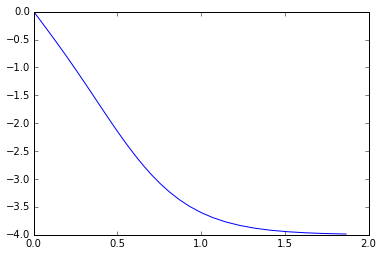

In [6]:
plt.plot(betas, E_T);